In [1]:
import re

In [3]:
import matplotlib.pyplot as plt

In [ ]:
# Initialize lists to store extracted information
epochs = []
mean_losses = []
loss_BC_values = []
loss_IC_values = []
loss_f_values = []
loss_sum_values = []  # Added list for the new loss
min_losses = []
min_losses_indices = []
max_losses = []
max_losses_indices = []
num_pinns_to_train_values = []
num_pinns_above_threshold_values = []
pinns_above_threshold_values = []

# Read the file line by line
with open('output_dt01_pyr.txt', 'r') as file:
    for line_number, line in enumerate(file, start=1):
        # Check if the line contains information about the epoch and losses
        if '==> Epoch:' in line:
            epoch_info = line.split(',')
            epochs.append(int(epoch_info[0].split()[-1]))
            mean_losses.append(float(epoch_info[1].split(':')[1]))
            loss_BC_values.append(float(epoch_info[2].split(':')[1]))
            loss_IC_values.append(float(epoch_info[3].split(':')[1]))
            loss_f_values.append(float(epoch_info[4].split(':')[1]))

            # Check if there are at least 6 elements in epoch_info before accessing the 6th element
            if len(epoch_info) > 5:
                loss_sum_values.append(float(epoch_info[5].split(':')[1]))
            else:
                loss_sum_values.append(None)  # Add None if information is not available

        # Check if the line contains information about minimum and maximum losses
        elif '=> minimum loss:' in line:
            min_info = line.split(',')
            min_losses.append(float(min_info[0].split(':')[1]))
            
            # Check if 'corresponding pinn/batch index' information is available
            if len(min_info) > 1 and 'corresponding pinn/batch index:' in line:
                min_losses_indices.append(int(min_info[1].split(':')[1].strip()))
            else:
                min_losses_indices.append(None)
            
            max_losses.append(float(min_info[-1].split(':')[1]))
            
            # Check if 'corresponding pinn/batch index' information is available
            if len(min_info) > 2 and 'corresponding pinn/batch index:' in line:
                max_losses_indices.append(int(min_info[-2].split(':')[1].strip()))
            else:
                max_losses_indices.append(None)

        # Check if the line contains information about the number of pinns to train
        elif '=> In : Number of pinns to train:' in line:
            num_pinns_info = line.split(':')
            num_pinns_to_train_values.append(int(num_pinns_info[-1].strip()))

# Print extracted information for debugging
print("Epochs:", epochs)
print("Mean Losses:", mean_losses)
print("Loss BC Values:", loss_BC_values)
print("Loss IC Values:", loss_IC_values)
print("Loss F Values:", loss_f_values)
print("Loss Sum Values:", loss_sum_values)  # Print the new loss values
print("Min Losses:", min_losses)
print("Min Losses Indices:", min_losses_indices)
print("Max Losses:", max_losses)
print("Max Losses Indices:", max_losses_indices)
print("Num Pinns to Train Values:", num_pinns_to_train_values)


In [17]:
def find_non_zero_index(epochs, loss_BC_values):
    for i, loss_value in enumerate(loss_BC_values):
        if loss_value != 0:
            return i

    # If no non-zero value is found, you might want to handle this case accordingly
    return None


In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
loss_sum_values = np.asarray(loss_sum_values)
loss_sum_values = np.nan_to_num(loss_sum_values, nan=0.0)
loss_sum_values = np.where(loss_sum_values == None, 0, loss_sum_values)

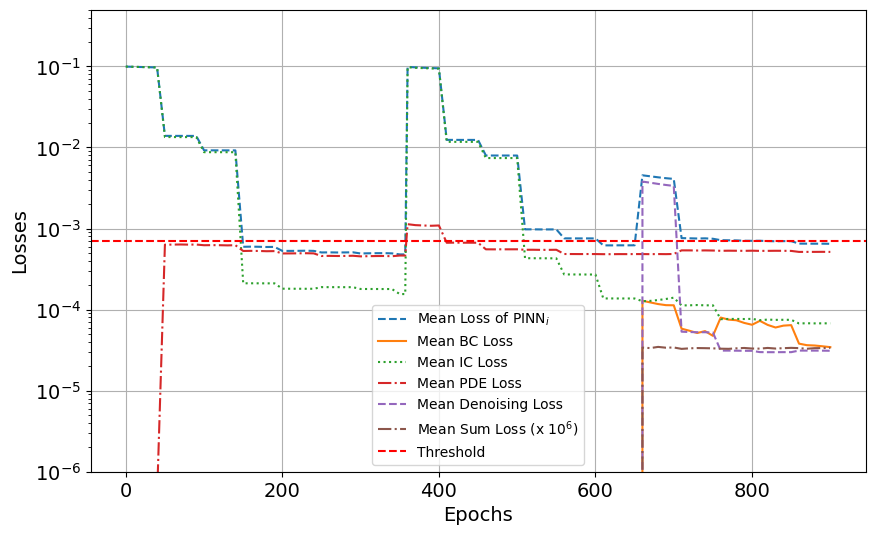

In [25]:


# Plotting
plt.figure(figsize=(10, 6))

# Plot mean loss of pinns '-': Solid line (default)
plt.plot(epochs, mean_losses, label='Mean Loss of PINN$_{i}$', linestyle='--')

# Plot mean loss of BC and IC
#plt.plot( [loss_BC + loss_IC for loss_BC, loss_IC in zip(loss_BC_values, loss_IC_values)], label='Mean Loss of BC + IC', marker='o', linestyle='--')

# Plot mean loss of BC
plt.plot( epochs, loss_BC_values, label='Mean BC Loss', linestyle='-')


# Plot mean loss of IC
plt.plot(epochs, loss_IC_values, label='Mean IC Loss', linestyle=':')

# Plot mean loss of f
plt.plot(epochs, loss_f_values, label='Mean PDE Loss', linestyle='-.')

mean_denoising_loss=abs(np.asarray(mean_losses)-np.asarray(loss_IC_values)-np.asarray(loss_f_values))-np.asarray(loss_BC_values)
index = find_non_zero_index(epochs, loss_BC_values)
mean_denoising_loss[:index] =0
plt.plot(epochs, mean_denoising_loss, label='Mean Denoising Loss', linestyle='--')

# Plot mean loss of f
loss_sum_values = np.asarray(loss_sum_values)
loss_sum_values = np.nan_to_num(loss_sum_values, nan=0.0)

plt.plot(epochs, np.asarray(loss_sum_values) *10e6, label='Mean Sum Loss (x $10^{6}$)', linestyle='-.')

# Plot maximum and minimum losses
#plt.plot(max_losses, label='Maximum Loss', marker='^', color='cyan')
#plt.plot( min_losses, label='Minimum Loss', marker='v', color='magenta')
plt.axhline(y=7e-4, color='r', linestyle='--', label='Threshold')
# Add labels and legend
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Losses',fontsize=14)
plt.yscale('log')
plt.ylim(bottom=1e-6, top=5e-1)  
#plt.title('Losses Over Epochs')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)             
plt.yticks(fontsize=14)  
plt.legend()
plt.grid(True)
plt.show()
